### Sepehr Rezaee - 99242067

# 1st question

## Import dependencies

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Create the needed functions

In [35]:
# Detection edges of the binary and the gray scale images
def edge_detection(image_path, image_type='binary'):
    
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    
    if image_type == 'binary':
        return edge_detection_binary(image)
    elif image_type == 'grayscale':
        return edge_detection_grayscale(image)
    else:
        raise ValueError("Invalid image_type. Must be 'binary' or 'grayscale'.")

def edge_detection_binary(image):
    # Threshold the image to create a binary image
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Apply Canny edge detection
    edges = cv2.Canny(binary_image, 50, 400)
    
    return edges

def edge_detection_grayscale(image):
    # Apply Canny edge detection
    edges = cv2.Canny(image, 50, 400)
    
    return edges

# Filling the holes in the binary and the gray scales images
def fill_holes(image_path, image_type='binary'):
    
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    
    if image_type == 'binary':
        return fill_holes_binary(image)
    elif image_type == 'grayscale':
        return fill_holes_grayscale(image)
    else:
        raise ValueError("Invalid image_type. Must be 'binary' or 'grayscale'.")

def fill_holes_binary(image):
    # Convert the image to grayscale if it's not already
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image

    # Threshold the image to create a binary image
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    # Fill the holes
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filled_image = cv2.drawContours(binary, contours, -1, 255, thickness=cv2.FILLED)

    # In the image back to the original binary form
    _, filled_image = cv2.threshold(filled_image, 0, 255, cv2.THRESH_BINARY_INV)

    return filled_image

def fill_holes_grayscale(image):
    # Convert the image to grayscale if it's not already
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image

    # Apply a closing operation to fill the holes
    kernel = np.ones((5, 5), np.uint8)
    filled_image = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

    return filled_image


def log_filter(image_path, kernel_size=3, sigma=1):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    log = cv2.Laplacian(blurred, cv2.CV_64F)
    return log

### Pathes of Binary, GrayScale and Lena images

In [36]:
binary_img1 = './Binary/1.png'
binary_img2 = './Binary/2.png'

grayScale_img1 = './GrayScale/1.jpeg'
grayScale_img2 = './GrayScale/2.png'

lena = './lena.tif'

### Applying on binary and grayScale and the Lena imges

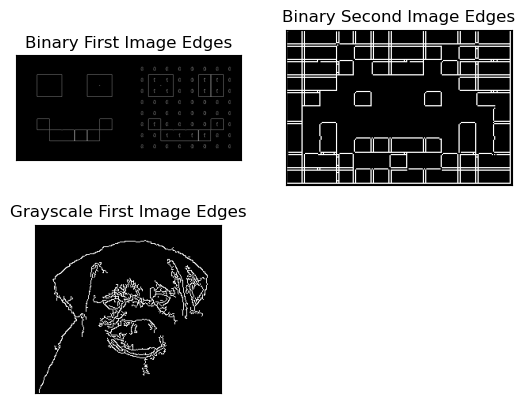

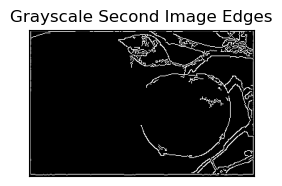

In [37]:
binary_edges_1 = edge_detection(binary_img1)
binary_edges_2 = edge_detection(binary_img2)

grayscale_edges_1 = edge_detection(grayScale_img1, 'grayscale')
grayscale_edges_2 = edge_detection(grayScale_img2, 'grayscale')

# Display the results
plt.subplot(221), plt.imshow(binary_edges_1, cmap='gray')
plt.title('Binary First Image Edges'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(binary_edges_2, cmap='gray')
plt.title('Binary Second Image Edges'), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(grayscale_edges_1, cmap='gray')
plt.title('Grayscale First Image Edges'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(224), plt.imshow(grayscale_edges_2, cmap='gray')
plt.title('Grayscale Second Image Edges'), plt.xticks([]), plt.yticks([])
plt.show()

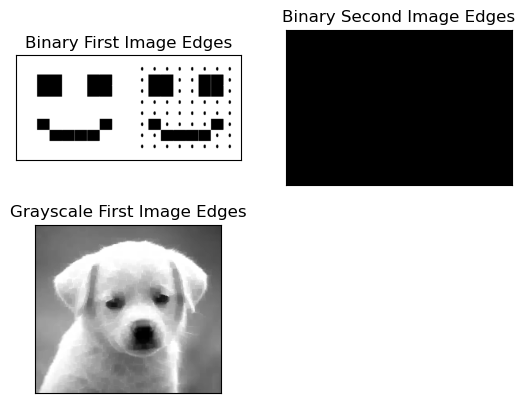

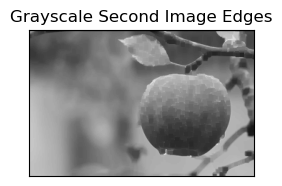

In [38]:
binary_edges_1 = fill_holes(binary_img1)
binary_edges_2 = fill_holes(binary_img2)

grayscale_edges_1 = fill_holes(grayScale_img1, 'grayscale')
grayscale_edges_2 = fill_holes(grayScale_img2, 'grayscale')

# Display the results
plt.subplot(221), plt.imshow(binary_edges_1, cmap='gray')
plt.title('Binary First Image Edges'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(binary_edges_2, cmap='gray')
plt.title('Binary Second Image Edges'), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(grayscale_edges_1, cmap='gray')
plt.title('Grayscale First Image Edges'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(224), plt.imshow(grayscale_edges_2, cmap='gray')
plt.title('Grayscale Second Image Edges'), plt.xticks([]), plt.yticks([])
plt.show()

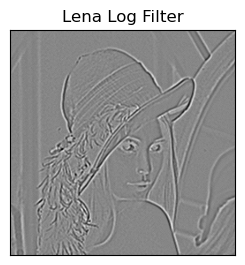

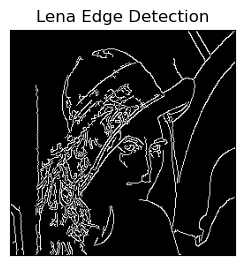

In [43]:
lena_log_filter = log_filter(lena)
lena_edge_detection = edge_detection(lena, 'grayscale')

plt.subplot(121), plt.imshow(lena_log_filter, cmap='gray')
plt.title('Lena Log Filter'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(122), plt.imshow(lena_edge_detection, cmap='gray')
plt.title('Lena Edge Detection'), plt.xticks([]), plt.yticks([])
plt.show()

# 2ed question

### Import dependencies

In [8]:
import cv2
import numpy as np
from sklearn.cluster import KMeans



#### Load the input texture sample

In [2]:
img_1 = './Texture/in/1.png'
img_2 = './Texture/in/2.png'
img_3 = './Texture/in/3.png'
img_4 = './Texture/in/4.png'

#### Diffine the min_cut function

In [4]:
def min_cut(block1, block2):
    # Compute the cost of cutting each possible seam.
    cost = np.sum(np.abs(block1 - block2), axis=2)
    cost = np.cumsum(cost, axis=0)

    # Dynamic programming to find min cut.
    cut = np.zeros(cost.shape, dtype=np.int)
    cut[0, :] = np.arange(cost.shape[1])
    for i in range(1, cost.shape[0]):
        for j in range(cost.shape[1]):
            if j == 0:
                idx = np.argmin(cost[i-1, j:j+2])
                cut[i, j] = j + idx
            else:
                idx = np.argmin(cost[i-1, j-1:j+2])
                cut[i, j] = j + idx - 1

    # Create the composite block.
    composite = np.zeros_like(block1)
    for i in range(cut.shape[0]):
        composite[i, :cut[i, 0]] = block1[i, :cut[i, 0]]
        composite[i, cut[i, 0]:] = block2[i, cut[i, 0]:]

    return composite

#### Deffine the synthesize_texture function

In [5]:
def synthesize_texture(sample, block_size, output_size):
    # Initialize the output image.
    output = np.zeros((output_size[0], output_size[1], 3), dtype=np.uint8)

    # Randomly select the first block from the sample.
    x = np.random.randint(0, sample.shape[1] - block_size[1])
    y = np.random.randint(0, sample.shape[0] - block_size[0])
    output[:block_size[0], :block_size[1]] = sample[y:y+block_size[0], x:x+block_size[1]]

    # Synthesize the texture block by block.
    for i in range(block_size[0], output_size[0], block_size[0]):
        for j in range(block_size[1], output_size[1], block_size[1]):
            # Find the block in the sample that is most similar to the current block.
            best_block = None
            best_error = np.inf
            for y in range(0, sample.shape[0] - block_size[0]):
                for x in range(0, sample.shape[1] - block_size[1]):
                    block = sample[y:y+block_size[0], x:x+block_size[1]]
                    error = np.sum((output[i-block_size[0]:i, j-block_size[1]:j] - block)**2)
                    if error < best_error:
                        best_error = error
                        best_block = block

            # Use min-cut to composite the best block with the current block.
            output[i-block_size[0]:i, j-block_size[1]:j] = min_cut(
                output[i-block_size[0]:i, j-block_size[1]:j], best_block)

    return output

#### Run the functions

In [9]:
# Load the sample texture.
sample1 = cv2.imread(img_1)
sample2 = cv2.imread(img_2)
sample3 = cv2.imread(img_3)
sample4 = cv2.imread(img_4)

In [11]:
# Synthesize a new texture.
output1 = synthesize_texture(sample1, (50, 50), (500, 500))
output2 = synthesize_texture(sample2, (50, 50), (500, 500))
output3 = synthesize_texture(sample3, (50, 50), (500, 500))
output4 = synthesize_texture(sample4, (50, 50), (500, 500))

C:\Users\Asus\AppData\Local\Temp\ipykernel_4992\2426504700.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cut = np.zeros(cost.shape, dtype=np.int)


In [12]:
# Save the output texture.
cv2.imwrite('output1.jpg', output1)
cv2.imwrite('output2.jpg', output2)
cv2.imwrite('output3.jpg', output3)
cv2.imwrite('output4.jpg', output4)

True